LAB #01



THIS IS MY FIRST LAB EXERCISE.

In [ ]:
# Some useful libraries
import numpy as np
from numpy.random import default_rng

#Pandas for data structure and analysis tools
import pandas as pd

#seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#SciKit learn import
import sklearn

#for nice vector graphics
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

np.random.seed(42) # Fixed seed for reproducibility, do not change this value
rng = default_rng()

<ipython-input-3-d3d7d7d861d1>:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Problem 5

We looked at the MNIST data set in class. Recall that MNIST is a data set of handwritten digits. It is considered one of the ``easiest'' image recognition problems in computer vision. You can find the MNIST data set which we will use, here: https://www.openml.org/d/554. Though we haven't introduced decision trees formally, we have had a chance to see them in action in class. This exercise is an opportunity to play around with this data set, and in advance of when we get to talk about decision trees in detail, have a chance to see how they work. In short, this is an exercise in learning-by-doing.


Part 1. (Nothing to submit) Make sure you can run through the entire Colab notebook posted. Especially if you haven't used Python, try to understand what every line is doing.

Part 2. How many data points are there, how many features are there, and what do the features represent?

Part 3. Compute how many times each digit appears in the dataset.

Part 4. Read the documentation for sklearn.model_selection.train_test_split and explain what this does.

Part 5. Read the documentation for DecisionTreeClassifier, and explain what score means.

Part 6. What happens to the **training score** as you increase the depth of the tree? Explain.

Part 7. What happens to the difference between **training score** and **testing score** as you increase the depth of the tree? Explain.

Part 8. Fix the depth of the three, say, depth=7. Then plot the difference of training score - testing score when you train on: 100, 500, 5000, 10000, 15,0000, 20,000, 25,000 points, always computing testing score by evaluating on the complement of the training set. Plot this trend.  Try to explain what you are seeing.  

###Part 2:

###Part 2:

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(data_id=554, as_frame=True)
data = mnist.data
labels = mnist.target
mnist = pd.concat([data, labels], axis=1)
mnist.rename(columns={mnist.columns[-1]: 'label'}, inplace=True)
print(mnist.head())
rows, cols = mnist.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  label  
0       0.0       0.0

*   Based on the shape of the mnist DataFrame, we can infer that there are 70000 data points which represent a unique handwritten digit from 0 to 9.
*   There are 784 different features in this dataframe which each correspond to the pixel value within a 28px28p image. The pixel values/features correspond to a given pixel's grayscale intensity

### Part 3:


In [ ]:
#print(mnist.columns)
label_counts = labels.value_counts()
print(label_counts)

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


### Part 4:
The ``` train_test_split``` feature allows you to partition your data into subsets for training and testing respectfully. This means that you can properly evaluate the performance of the model with on the testing data, giving a more accurate estimate on how the model will perform on new data.



### Part 5:
The ``` DecisionTreeClassifier ``` is an object which may be created to train a model implemented for classification problems. The model will construct a decision tree with optimized decision criteria and make appropriate classifications when provided new data for prediction. The score metric provides the accuracy of the model - i.e. the proportion of correctly predicted labels to the total number of labels.

### Part 6:
When you increase the height of the decision tree, the training error will decrease consistently. This is because the model becomes more specifically designed to make decisions based on the provided training data.

### Part 7:
When you increase the depth of the decision tree, the magnitude of the difference between the training and testing error will grow larger. This is because the model will begin to overfit to the training data. The test error will increase as the model makes assumptions about the data that may only be reflected by the training data set.

### Part 8:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree

training_sizes = [100, 500, 5000, 10000, 15000, 20000, 25000]
training_scores = []
testing_scores = []
differences = []
n=70000

for size in training_sizes:
  X_train, X_test, Y_train, Y_test = train_test_split(data, labels, train_size=size, test_size=n-size)
  dt = tree.DecisionTreeClassifier(max_depth=7)
  dt.fit(X_train,Y_train)
  train_score = dt.score(X_train,Y_train)
  test_score = dt.score(X_test, Y_test)
  differences.append(train_score-test_score)
  training_scores.append(train_score)
  testing_scores.append(test_score)

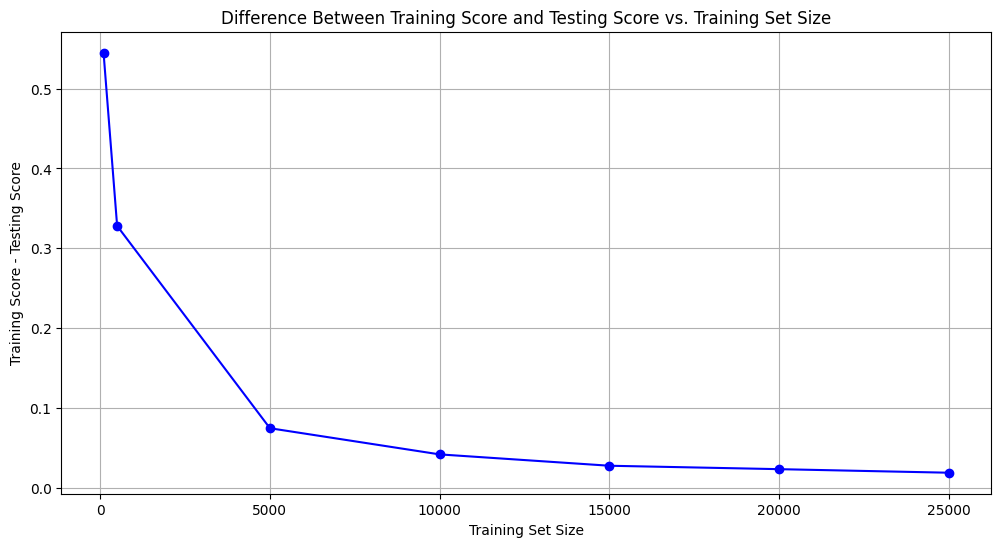

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(training_sizes, differences, marker='o', linestyle='-', color='b')
plt.xlabel('Training Set Size')
plt.ylabel('Training Score - Testing Score')
plt.title('Difference Between Training Score and Testing Score vs. Training Set Size')
plt.grid(True)
plt.show()

What is shown above is the performance of the model is increasing as the training data set size becomes larger.

# Problem 6

We now turn to a somewhat more sophisticated data set: CIFAR10.
Here is an initial colab notebook: https://colab.research.google.com/drive/1H3a4yVuZLatBvFjrUp5aFBJn_vfmXj7o?usp=sharing

Part 1. How many data points are there, and how many labels? How many points for each label?

Part 2. There are two ``TO DOs'' listed in the colab notebook. Complete these.


If you did this correctly and ran the notebook, you noticed that CIFAR10 indeed looks like a ``harder'' problem. Deep trees are again doing very well on the training set, and they do a little better than guessing on the testing data, but not as well as they do on MNIST. We will revisit CIFAR10 several times, as we develop more powerful tools. And we will see that we will do much better than deep decision trees!

### Part 1:
The data set consists of 50,000 training data points and 10,000 testing data points. There are 10 total labels.
For each label in the training set there are 5000 samples. For each label in the testing set there are 1000 samples.

### Part 2:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn import tree

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Reshape X_train
num_train_samples, height, width, channels = X_train.shape
X_tr = X_train.reshape(num_train_samples, height * width * channels)
new_shape = X_tr.shape
print(f"New shape of X_tr: {new_shape}")

New shape of X_tr: (50000, 3072)


In [ ]:
X_test = X_test.reshape(X_test.shape[0], height * width * channels)
train_accuracies = []
test_accuracies = []
depths = range(1, 16)

for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_tr, y_train.ravel()) # takes very long to train the models ***
    train_accuracy = clf.score(X_tr, y_train)
    test_accuracy = clf.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', linestyle='--', color='r', label='Testing Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()